**Klasterlash**

| Tur                              | Tavsif                                                                                    |
| -------------------------------- | ----------------------------------------------------------------------------------------- |
| **K-means**                      | Har bir klaster uchun markaz (centroid) aniqlab, unga eng yaqin nuqtalarni birlashtiradi. |
| **Hierarchical**                 | Klasterlar daraxtsimon tarzda hosil bo‘ladi.                                              |
| **DBSCAN**                       | Zichlik asosida klasterlarni aniqlaydi, shovqinli nuqtalarni ajratadi.                    |
| **Gaussian Mixture Model (GMM)** | Ehtimollik asosida klasterlarni aniqlaydi (har bir klasterga a’zo bo‘lish ehtimoli).      |


K-Means nazariyasi

Ishlash bosqichlari:

Klasterlar soni
𝑘
k ni tanlash.

Tasodifiy
𝑘
k ta markaz tanlash.

Har bir nuqtani eng yaqin markazga biriktirish.

Har bir klasterning yangi markazini hisoblash.

Markazlar o‘zgarmaguncha (yoki cheklovga yetguncha) 3-4 bosqichlarni takrorlash.

Afzalliklar:

Oddiy va tez ishlaydi.

Katta datasetlar uchun samarali.

Kamchiliklar:

𝑘
k oldindan berilishi kerak.

To‘g‘ri ishlashi uchun ma’lumotlar tarqalgan shakli muhim.

Har doim global minimumga yetmasligi mumkin.

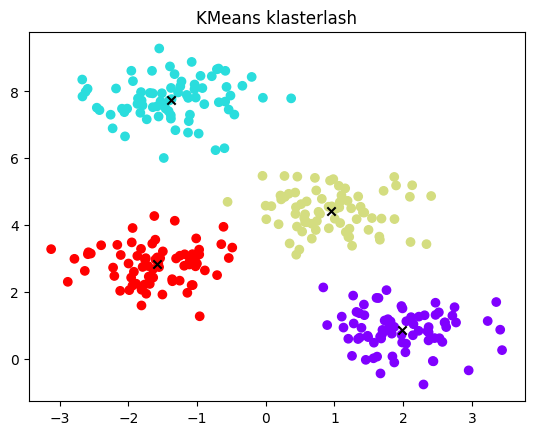

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Soxta ma'lumotlar yaratamiz
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# 2. KMeans modelini o'qitamiz
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# 3. Natijalarni chizamiz
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')
plt.title("KMeans klasterlash")
plt.show()

Elbow usuli bilan optimal k topish

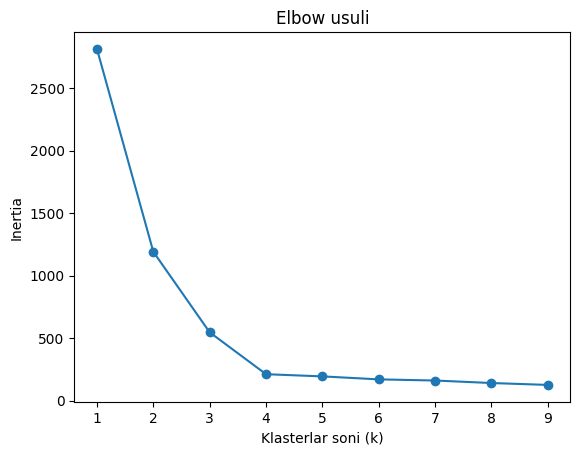

In [2]:
inertia = []
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia.append(model.inertia_)  # Inertia = ichki dispersiya

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Klasterlar soni (k)')
plt.ylabel('Inertia')
plt.title('Elbow usuli')
plt.show()

DBSCAN

eps — qo‘shni radius, min_samples — minimal nuqta soni (zichlik uchun).

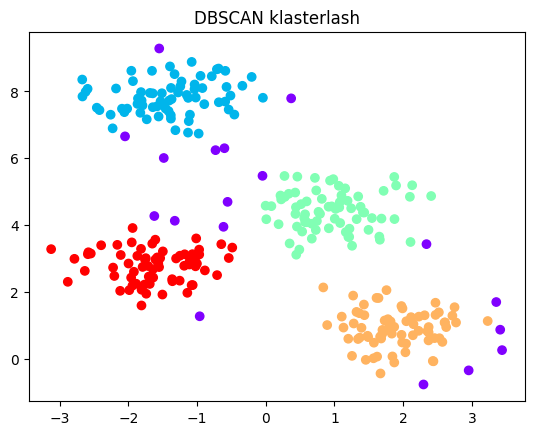

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("DBSCAN klasterlash")
plt.show()

Klasterlash natijalarini baholash

Silhouette Score: 0–1 oralig‘ida klaster sifatini baholaydi.

In [6]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette score: {score:.2f}")

Silhouette score: 0.68


| Algoritm         | `k` kerakmi? | Shovqinga bardoshlimi? | Har xil shakllarda ishlaydimi? | Tezligi |
| ---------------- | ------------ | ---------------------- | ------------------------------ | ------- |
| **KMeans**       | ✅            | ❌                      | ❌                              | 🔼      |
| **Hierarchical** | ❌            | ❌                      | ⚠️                             | ⚠️      |
| **DBSCAN**       | ❌            | ✅                      | ✅                              | ⚠️      |
| **GMM**          | ✅            | ❌                      | ✅ (elliptik)                   | 🔼      |
| **MeanShift**    | ❌            | ⚠️                     | ✅                              | ❌       |
